### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop 'car' column
data.drop(columns=['car'], inplace=True)

# Filter out rows where 'Bar' column is empty
data = data[data['Bar'].notna()]

# Fill missing values with their mode
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)

#Check if done correctly
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


#### 4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Calculate the proportion of the total observations that chose to accept the coupon
total_observations = data.shape[0]
accept_coupons = data[data['Y'] == 1].shape[0]
proportion_accept = accept_coupons / total_observations

print(f"Accepted: {proportion_accept:.2f}")

Accepted: 0.57


#### 5. Use a bar plot to visualize the `coupon` column.

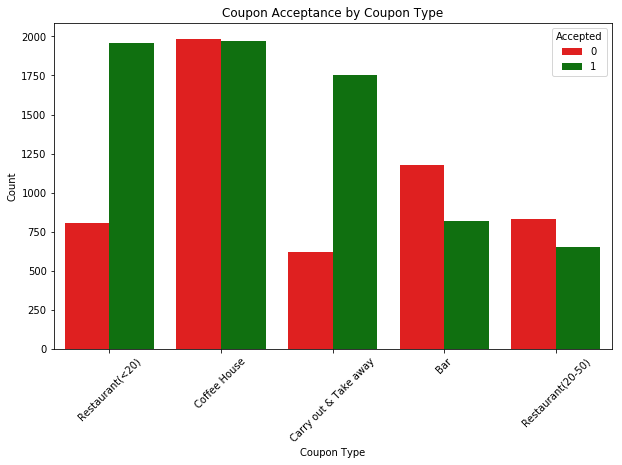

In [7]:
plt.figure(figsize=(10, 6))

# Create bar plot
sns.countplot(data=data, x='coupon', hue='Y', palette={0: 'red', 1: 'green'})
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# 0 = not accepted, 1 = accepted
plt.legend(title='Accepted', loc='upper right', labels=['0', '1'])
plt.xticks(rotation=45)
plt.show()


#### 6. Use a histogram to visualize the temperature column.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


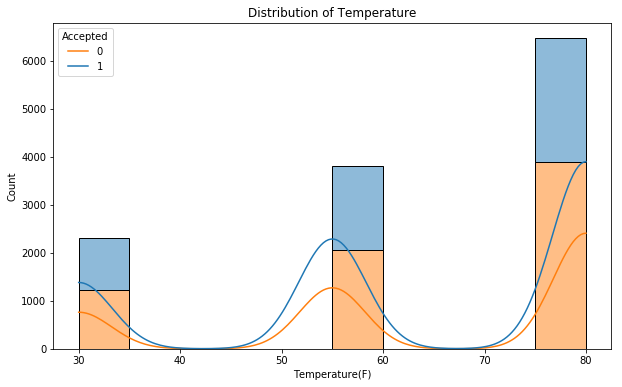

In [8]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create a histogram for 'temperature'
sns.histplot(data=data, x='temperature', hue='Y', bins= 10, kde= True, multiple='stack')

# Titles, labels, legend, show plot
plt.title('Distribution of Temperature')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')

# 0 = not accepted, 1 = accepted
plt.legend(title='Accepted', labels=['0', '1'])
plt.show()



## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Filter the dataset to include only bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']
new_data = bar_coupons.copy()
new_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


#### 2. What proportion of bar coupons were accepted?


In [10]:
# Calculate proportion of bar coupons that were accepted

accepted_proportion = new_data['Y'].mean() * 100

print(f"Proportion Accepted: {accepted_proportion:.2f}%")

Proportion Accepted: 41.03%


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Group 1 are those who went to a bar 3 of fewer times a month
group1 = new_data[new_data['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2 are those who went more than 3 times a month
group2 = new_data[new_data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rate for each group
acceptance_less3 = group1['Y'].mean()
acceptance_more3 = group2['Y'].mean()

print(f"Acceptance rate for visiting a bar 3 or fewer times a month: {acceptance_less3:.2%}")
print(f"Acceptance rate for visiting a bar more than 3 times a month: {acceptance_more3:.2%}")



Acceptance rate for visiting a bar 3 or fewer times a month: 37.06%
Acceptance rate for visiting a bar more than 3 times a month: 76.88%


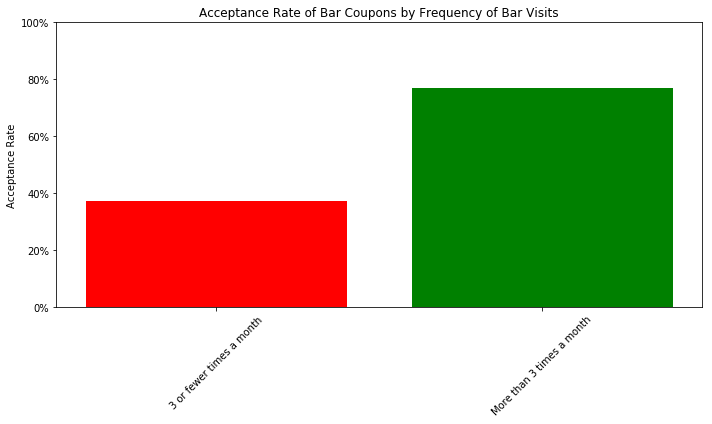

In [12]:
# Plot the acceptance rate for problem 3
plt.figure(figsize=(10, 6))
plt.bar(['3 or fewer times a month', 'More than 3 times a month'], [acceptance_less3, acceptance_more3], color=['red', 'green'])
plt.title('Acceptance Rate of Bar Coupons by Frequency of Bar Visits')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
# Convert 'age' column to numeric type as it keeps getting an error if you don't
new_data['age'] = pd.to_numeric(new_data['age'], errors='coerce')

# Group 1 are drivers who go to a bar more than once a month and are over the age of 25
group1 = new_data[(new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (new_data['age'] > 25)]

# Group 2 are all the others
group2 = new_data[~((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (new_data['age'] > 25))]

# Calculate acceptance rates 
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

# Print the acceptance rates
print(f"Acceptance Rate for Group 1 (Bar > 1 time per month, age > 25): {acceptance_rate_group1:.2%}")
print(f"Acceptance Rate for Group 2 (All Others): {acceptance_rate_group2:.2%}")

Acceptance Rate for Group 1 (Bar > 1 time per month, age > 25): 69.97%
Acceptance Rate for Group 2 (All Others): 34.81%


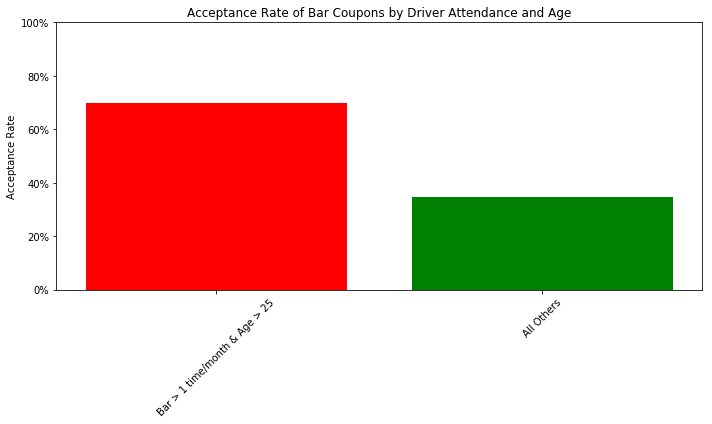

In [14]:
# Plot accepteance rate for problem 4
plt.figure(figsize=(10, 6))
plt.bar(['Bar > 1 time/month & Age > 25', 'All Others'], [acceptance_rate_group1, acceptance_rate_group2], color=['red', 'green'])
plt.title('Acceptance Rate of Bar Coupons by Driver Attendance and Age')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  
plt.tight_layout()
plt.show()

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
# Group 1 are drivers who meet all 3 criterias
# Drivers who go to bars more than once a month
# Has passengers that were not a kid
# Had occupation other than farming, fishing, or forestry

group1 = new_data[
    (new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~new_data['passanger'].isin(['kid(s)'])) & 
    (~new_data['occupation'].isin(['farming, fishing, or forestry']))
]

# Group 2 are drivers who do not meet all 3 criterias listed above
group2 = new_data[
    ~((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (~new_data['passanger'].isin(['kid(s)'])) & 
      (~new_data['occupation'].isin(['farming, fishing, or forestry'])))
]

# Calculate acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

# Print the acceptance rates
print(f"Acceptance Rate for Group 1 (All 3 criterias were met): {acceptance_rate_group1:.2%}")
print(f"Acceptance Rate for Group 2 (Criterias were not met): {acceptance_rate_group2:.2%}")

Acceptance Rate for Group 1 (All 3 criterias were met): 68.79%
Acceptance Rate for Group 2 (Criterias were not met): 29.21%


#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
#Convert 'income' column to numeric type
new_data['income'] = pd.to_numeric(new_data['income'], errors='coerce')

# Group 1 are drivers who meet at least one of the specified criteria above
group1 = new_data[
    ((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~new_data['passanger'].isin(['kid(s)'])) & (new_data['maritalStatus'] != 'widowed')) |
    ((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (new_data['age'] < 30)) |
    ((new_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (new_data['income'] < 50000))
]

# Group 2 are drivers who do not meet any of the specified criteria above
group2 = new_data[
    ~(((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~new_data['passanger'].isin(['kid(s)'])) & (new_data['maritalStatus'] != 'widowed')) |
    ((new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (new_data['age'] < 30)) |
    ((new_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (new_data['income'] < 50000)))
]

# Calculate acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

# Print the acceptance rates
print(f"Acceptance Rate for Group 1 (At least 1 of the criterias were met): {acceptance_rate_group1:.2%}")
print(f"Acceptance Rate for Group 2 (No criterias were met): {acceptance_rate_group2:.2%}")

Acceptance Rate for Group 1 (At least 1 of the criterias were met): 68.79%
Acceptance Rate for Group 2 (No criterias were met): 29.21%


#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, multiple hypothesis could be made about who is accepting the bar coupons. It seems that the more a driver visits a bar, the more likely they are to accept the bar coupons. It also seems that drivers under 30 and over 25, while going to the bar at least once a month, are likely to accept bar coupons. Drivers with income less than $50k and go to cheap resturants 4 times a month are also more likely to accept bar coupons. Finally, drivers who do not have kids as passengers, and go to the bar more than one time a month, are likely to accept as well.

## Independent Investigation - Coffee Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons. I chose to do coffee coupons.

In [17]:
# Filter the dataset to include only coffee house related coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']
new_data_coffee = coffee_coupons.copy()
new_data_coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


#### First I wanted to see what the accepted proportion was for coffee house coupons

In [18]:
# Calculate proportion of coffee house coupons that were accepted

accepted_proportion = new_data_coffee['Y'].mean() * 100

print(f"Proportion Accepted: {accepted_proportion:.2f}%")

Proportion Accepted: 49.84%


#### Proceeded to calculate and plot the acceptance rates by gender

Acceptance Rate by Gender:
gender
Female    49.264706
Male      50.442939
Name: Y, dtype: float64


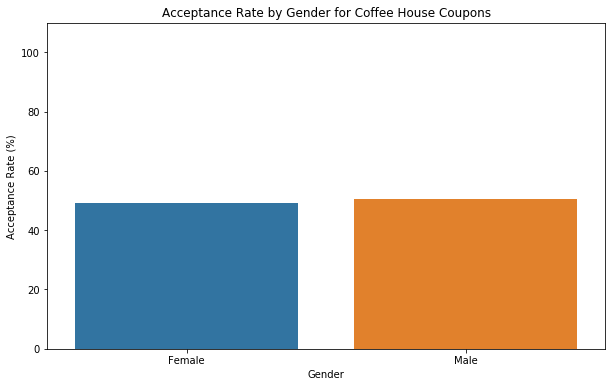

In [19]:
# Calculate acceptance rates by gender
acceptance_rate_by_gender = new_data_coffee.groupby('gender')['Y'].mean() * 100
print(f"Acceptance Rate by Gender:\n{acceptance_rate_by_gender}")

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_by_gender.index, y=acceptance_rate_by_gender.values)
plt.title('Acceptance Rate by Gender for Coffee House Coupons')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 110)
plt.show()

#### Calculated the acceptance rate by gender and age, then plotted using heatmap

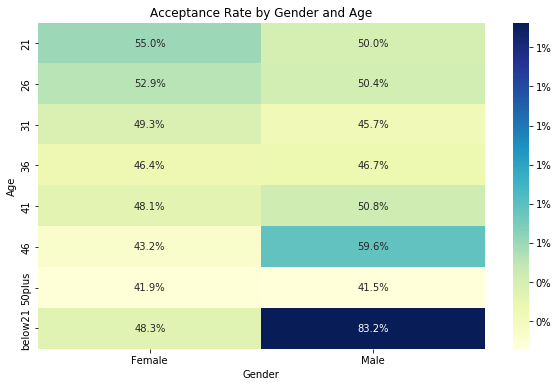

In [20]:
# Calculate acceptance rate by gender and age
acceptance_rate_by_gender_age = new_data_coffee.groupby(['gender', 'age'])['Y'].mean().reset_index()

# Pivot data for heatmap
pivot_data = acceptance_rate_by_gender_age.pivot('age', 'gender', 'Y')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.1%', cbar_kws={'format': '%.0f%%'})
plt.title('Acceptance Rate by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#### Calculated the acceptance rate by gender and marital status, then plotted using heatmap again

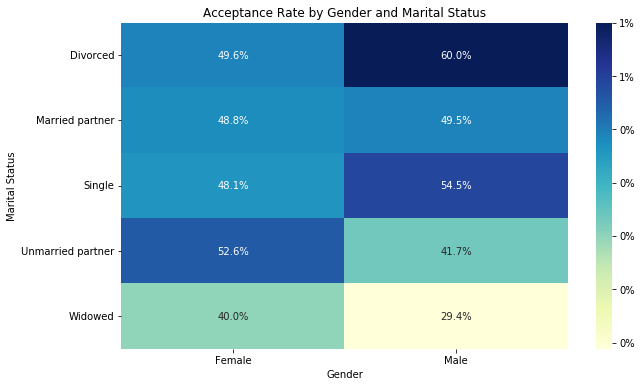

In [21]:
# Calculate acceptance rate by gender and marital status
acceptance_rate_by_gender_marital = new_data_coffee.groupby(['gender', 'maritalStatus'])['Y'].mean().reset_index()

# Pivot data for heatmap
pivot_data = acceptance_rate_by_gender_marital.pivot('maritalStatus', 'gender', 'Y')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.1%', cbar_kws={'format': '%.0f%%'})
plt.title('Acceptance Rate by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Marital Status')
plt.show()

#### Finally, calculated the acceptance rate by gender and visits, then plotted using heatmap

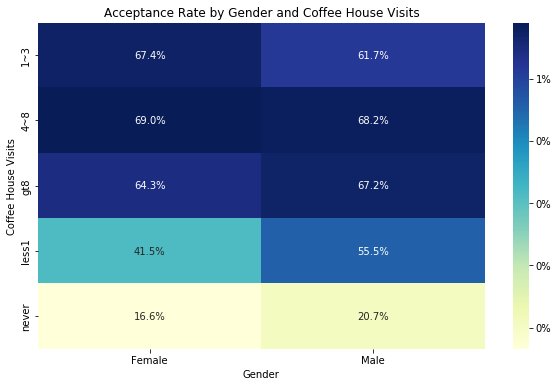

In [22]:
# Calc acceptance rate by gender and coffee house visits
acceptance_rate_by_gender_coffeehouse = new_data_coffee.groupby(['gender', 'CoffeeHouse'])['Y'].mean().reset_index()

# Pivot data for heatmap
pivot_data = acceptance_rate_by_gender_coffeehouse.pivot('CoffeeHouse', 'gender', 'Y')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.1%', cbar_kws={'format': '%.0f%%'})
plt.title('Acceptance Rate by Gender and Coffee House Visits')
plt.xlabel('Gender')
plt.ylabel('Coffee House Visits')
plt.show()

## Key Findings:

* Females have an acceptance rate of 49.26%, Males have an acceptance rate of 50.44%
* Males below 21 have the highest acceptance rate at 83.2%
* Males over 50 had the lowest at 41.5%
* Divorced males had the highest rate at 60.0%
* Widowed males had the lowest at 29.4%
* Females who visit the coffee house 4-8 times a month have the highest acceptance rate at 69.0%
* Females who never visit the coffee house have the lowest rate at 16.6%

## Summary:



Based off the multiple simulations, there are many observations that can be made about coffee house coupon acceptance rates. First off, the proportion accepted for coffee house coupons was calculated to be 49.84%. I then separated by gender and found that females have a total acceptance rate of 49.26%, while males had a slighty higher rate of 50.44%. 

In my second simulation, I chose to find the acceptance rate in regards to gender and age. Males under 21 have a crazy acceptance rate of 83.2%, 46 year old males are second at 59.6% while every other category hovers around 50%. I did the same for gender and marital status, divorced males were found to have the highest rate at 60%, while unmarried partner females have the highest at 52.6%. Widowed males also had the lowest acceptance rate at 29.4%. 

Finally, I did one with gender and coffee house vits and found that males and females who visit the coffee house 4-8 times a month have the highest proportion acceptance rates at 69.0% and 68.2%. It seems like besides the people that never go to coffee houses and females who go less than 1 times a month, everyone else has an proportional acceptance rate over 50%. 

## Next Step/Recommendations:

The next step would be to go into more detail and include variables such as time, destination, weather, and temperature.

When it comes to recommendations, I feel that there are better ways to clean the data that could give a better result. 